
Escolhi o Random Forest Classifier, visto que ele consegue lidar com base de dados categóricas quando se usa o label_enconder, ele foi robusto na classificação mesmo com a base de dados desbalanceada, tendo uma boa acurácia.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
sns.set_theme(color_codes=True)
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv("car.data", names=columns)

df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=7)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# ... (your existing code for loading and splitting data) ...

# Create a LabelEncoder for each categorical feature
label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object':  # Check if column is categorical
        label_encoders[column] = LabelEncoder()
        X_train[column] = label_encoders[column].fit_transform(X_train[column])
        # Apply the same encoding to the test set
        X_test[column] = label_encoders[column].transform(X_test[column])

# Now you can train the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# ... (rest of your code) ...

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 98.26589595375722 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_pred = rfc.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         acc       0.98      0.96      0.97       112
        good       1.00      0.82      0.90        17
       unacc       0.99      1.00      0.99       363
       vgood       0.93      1.00      0.96        27

    accuracy                           0.98       519
   macro avg       0.97      0.94      0.96       519
weighted avg       0.98      0.98      0.98       519



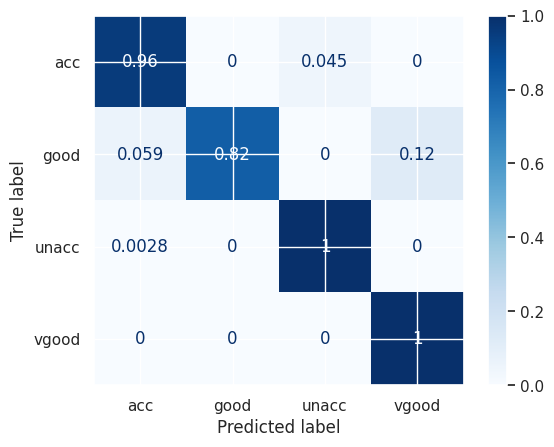

In [ ]:

disp = ConfusionMatrixDisplay.from_estimator(
    rfc, X_test, y_test, display_labels=rfc.classes_, cmap=plt.cm.Blues, normalize='true'
)
